In [2]:
%matplotlib inline

In [3]:
!pip install --upgrade tensorflow
!pip install keras

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 195.6 MB 164 kB/s eta 0:00:016
     |████████████████████████████████| 3.7 MB 760 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.2 MB/s eta 0:00:011
     |████████████████████████████████| 2.9 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 9.0 MB/s eta 0:00:01
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
     |████████████████████████████████| 132 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 4.8 MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-macosx_10_9_x86_64.whl size=32514 sha256=6d914a35b7e594a5

You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [6]:
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.5.0


Load MNIST Data, hand written 0-9 data, 28x28 images 
and seperate train data and test data

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

8


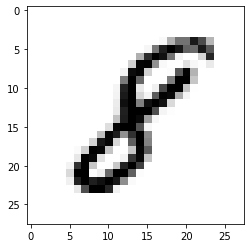

In [8]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # image
plt.imshow(x_train[image_index], cmap='Greys')

In [9]:
x_train.shape


(60000, 28, 28)

In [10]:
print(y_train[image_index])

8


Normalizing the data

In [11]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Building Convolutional Neural Network

In [12]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Compiling and Fitting the Model

In [13]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])# first-order gradient-based optimization of SGD
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 26s 7ms/step - loss: 0.3405 - accuracy: 0.8983
Epoch 2/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0808 - accuracy: 0.9747
Epoch 3/3
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0525 - accuracy: 0.9837


Evaluating the Model

In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0581 - accuracy: 0.9826


[0.058109160512685776, 0.9825999736785889]

Prediction for below image is 1


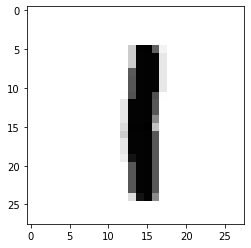

In [18]:
import numpy as np
image_index = 9090

pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print("Prediction for below image is "+str(pred.argmax()))
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
plt.show()